In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dushyanthbommana/CE888/main/essex-stop-search.csv")
df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-06-30T23:01:00+00:00,False,NaN,51.776969,1.119975,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False
1,Person search,2020-06-30T23:01:00+00:00,False,NaN,51.884603,0.921385,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Summons / charged by post,False,False
2,Person search,2020-07-01T00:01:00+00:00,False,NaN,51.567500,0.434043,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False
3,Person and Vehicle search,2020-07-01T02:01:00+00:00,False,NaN,51.585496,0.500271,Female,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False
4,Person and Vehicle search,2020-07-01T06:01:00+00:00,False,NaN,51.876726,1.006272,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,NaN,False,False


In [3]:
df.shape

(7790, 15)

In [4]:
df.describe()

,Policing operation,Latitude,Longitude
count,0.0,7494.000000,7494.000000
mean,NaN,51.714273,0.509850
std,NaN,0.277793,0.629549
min,NaN,50.692644,-8.065707
25%,NaN,51.567426,0.353087
50%,NaN,51.671251,0.520333
75%,NaN,51.812031,0.728510
max,NaN,54.948226,1.318035


In [6]:
df["Gender"].fillna("Other" ,inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7790 entries, 0 to 7789
Data columns (total 15 columns):
Type                                        7790 non-null object
Date                                        7790 non-null object
Part of a policing operation                7790 non-null bool
Policing operation                          0 non-null float64
Latitude                                    7494 non-null float64
Longitude                                   7494 non-null float64
Gender                                      7790 non-null object
Age range                                   7790 non-null object
Self-defined ethnicity                      7185 non-null object
Officer-defined ethnicity                   7144 non-null object
Legislation                                 7779 non-null object
Object of search                            3402 non-null object
Outcome                                     7745 non-null object
Outcome linked to object of search          3402 n

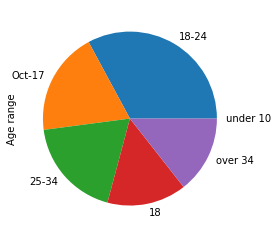

In [8]:
df["Age range"].value_counts().plot(kind="pie")

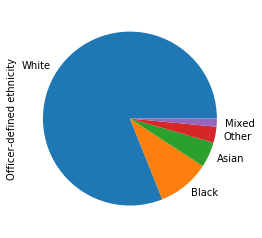

In [9]:
df["Officer-defined ethnicity"].value_counts().plot(kind="pie")

In [38]:
clarity_color_table1 = pd.crosstab(index=df["Gender"], 
                          columns=df["Age range"])

clarity_color_table1

Age range,18,18-24,25-34,Oct-17,over 34,under 10
Gender,,,,,,
Female,53,326,161,194,159,0
Male,484,2228,1300,1301,962,1
Other,613,7,0,1,0,0


In [12]:
clarity_color_table = pd.crosstab(index=df["Legislation"], 
                          columns=df["Type"])
clarity_color_table

Type,Person and Vehicle search,Person search,Vehicle search
Legislation,,,
Criminal Justice and Public Order Act 1994 (section 60),0,17,0
Firearms Act 1968 (section 47),15,22,2
Misuse of Drugs Act 1971 (section 23),898,4086,429
Poaching Prevention Act 1862 (section 2),1,6,0
Police and Criminal Evidence Act 1984 (section 1),216,1975,110
Psychoactive Substances Act 2016 (s36(2)),0,1,0
Wildlife and Countryside Act 1981 (section 19),0,1,0


In [41]:
clarity_color_table1 = pd.crosstab(index=df["Gender"], 
                          columns=df["Officer-defined ethnicity"])

clarity_color_table1

Officer-defined ethnicity,Asian,Black,Mixed,NOt known,Other,White
Gender,,,,,,
Female,17,49,11,4,20,792
Male,320,641,96,38,191,4990
Other,1,5,0,604,1,10


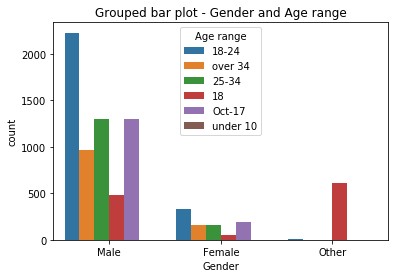

In [40]:
sns.countplot(x=df["Gender"], hue=df["Age range"], data=df)
plt.title('Grouped bar plot - Gender and Age range')
plt.show()

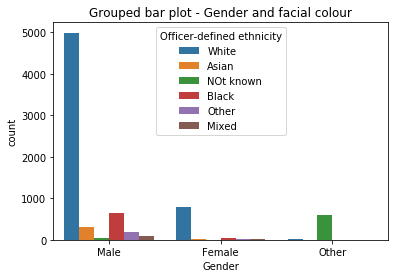

In [42]:
sns.countplot(x=df["Gender"], hue=df["Officer-defined ethnicity"], data=df)
plt.title('Grouped bar plot - Gender and facial colour')
plt.show()

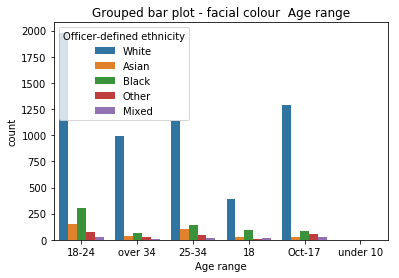

In [17]:
sns.countplot(x=df["Age range"], hue=df["Officer-defined ethnicity"], data=df)
plt.title('Grouped bar plot - facial colour  Age range')
plt.show()

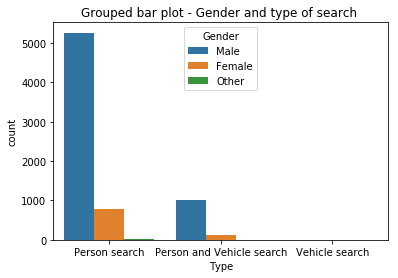

In [22]:
sns.countplot(x=df["Type"], hue=df["Gender"], data=df)
plt.title('Grouped bar plot - Gender and type of search ')
plt.show()

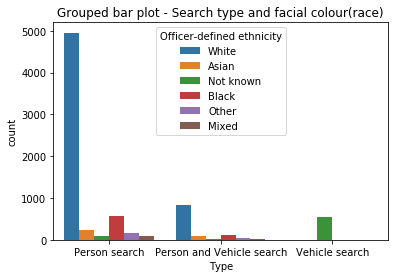

In [21]:
sns.countplot(x=df["Type"], hue=df["Officer-defined ethnicity"], data=df)
plt.title('Grouped bar plot - Search type and facial colour(race)')
plt.show()

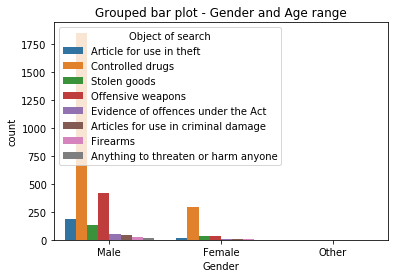

In [42]:
sns.countplot(x=df["Gender"], hue=df["Object of search"], data=df)
plt.title('Grouped bar plot - Gender and Age range')
plt.show()

In [21]:
clarity_color_table = pd.crosstab(index=df["Legislation"], 
                          columns=df["Gender"])
clarity_color_table

Gender,Female,Male,Other
Legislation,,,
Criminal Justice and Public Order Act 1994 (section 60),2,15,0
Firearms Act 1968 (section 47),4,33,0
Misuse of Drugs Act 1971 (section 23),644,4281,10
Poaching Prevention Act 1862 (section 2),0,7,0
Police and Criminal Evidence Act 1984 (section 1),241,1931,2
Psychoactive Substances Act 2016 (s36(2)),0,1,0
Wildlife and Countryside Act 1981 (section 19),0,1,0
